In [43]:
import requests
import pandas as pd
import json
from datetime import datetime
import pytz
import csv
from datetime import timezone
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
api_key = 'a75a84e48241965a215cb7ab7656bc92'
# api_key = 'bd5e378503939ddaee76f12ad7a97608'
city = 'Hanoi'

In [47]:
lat = '21.035584'
lon = '105.852771'

# set start date and end date
# Naive datetime
start_dt_naive = datetime(2024, 1, 1, 00, 00)
end_dt_naive = datetime(2024, 1, 8, 00, 00)

# Convert to UTC timezone-aware datetime
start_dt_utc = start_dt_naive.replace(tzinfo=pytz.UTC)
end_dt_utc = end_dt_naive.replace(tzinfo=pytz.UTC)
print('start_dt_utc: ', start_dt_utc)
print('end_dt_utc: ', end_dt_utc)

# Get epoch timestamp
start = int(start_dt_utc.timestamp())
end = int(end_dt_utc.timestamp())

print(start)
print(end)

start_dt_utc:  2024-01-01 00:00:00+00:00
end_dt_utc:  2024-01-08 00:00:00+00:00
1704067200
1704672000


In [22]:
def kelvin_to_celsius(kelvin_temp):
    """
    Converts temperature from Kelvin to Celsius.

    Parameters:
        kelvin_temp (float): Temperature in Kelvin.

    Returns:
        float: Temperature in Celsius.
    """
    return kelvin_temp - 273.15

In [23]:
def timestamp_to_datetime(timestamp):
    """
    Converts a Unix timestamp to a timezone-aware datetime object in UTC.

    Parameters:
        timestamp (int): Unix timestamp.

    Returns:
        str: Datetime in ISO 8601 format (YYYY-MM-DD HH:MM:SS).
    """
    return datetime.fromtimestamp(timestamp, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')


In [31]:
api_key = 'f5a43a81531fc1bbaeec4f8048012929'
air_pollution_history_url = f'https://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
air_pollution_history_response = requests.get(air_pollution_history_url)
print(air_pollution_history_response)
air_pollution_history_json_response = air_pollution_history_response.json()
air_pollution_history_json_response

<Response [504]>


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [58]:
air_pollution_history_df=pd.read_csv("../data/raw/aqi_data.csv")

In [59]:
air_pollution_history_df.head()

,Unnamed: 0,timestamp,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,0,1701388800,2830.51,0.71,91.85,7.33,98.23,302.49,352.06,25.84,5
1,1,1701392400,3204.35,5.25,101.45,0.89,103.95,348.80,395.55,27.61,5
2,2,1701396000,3845.21,21.46,108.30,0.07,116.35,411.29,462.70,34.96,5
3,3,1701399600,4272.46,42.47,113.79,1.99,131.61,449.61,504.76,33.44,5
4,4,1701403200,3471.37,38.89,119.27,12.34,164.03,419.67,462.73,13.05,5


In [60]:
air_pollution_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8665 entries, 0 to 8664
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8665 non-null   int64  
 1   timestamp   8665 non-null   int64  
 2   CO          8665 non-null   float64
 3   NO          8665 non-null   float64
 4   NO2         8665 non-null   float64
 5   O3          8665 non-null   float64
 6   SO2         8665 non-null   float64
 7   PM2_5       8665 non-null   float64
 8   PM10        8665 non-null   float64
 9   NH3         8665 non-null   float64
 10  AQI         8665 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 744.8 KB


In [ ]:
# Features of the air quality
aqi = []
co = []
no = []
no2 = []
o3 = []
so2 = []
pm2_5 = []
pm10 = []
nh3 = []
timestamp = []
datetime = []

for data in air_pollution_history_json_response['list']:
    aqi.append(data['main']['aqi'])
    co.append(data['components']['co'])
    no.append(data['components']['no'])
    no2.append(data['components']['no2'])
    o3.append(data['components']['o3'])
    so2.append(data['components']['so2'])
    pm2_5.append(data['components']['pm2_5'])
    pm10.append(data['components']['pm10'])
    nh3.append(data['components']['nh3'])
    timestamp.append(data['dt'])
    datetime.append(timestamp_to_datetime(data['dt']))

In [ ]:
# create dataframe of all the features
aqi_df = pd.DataFrame({'Datetime': datetime,'Timestamp':timestamp, 'CO': co, 'NO': no, 'NO2': no2, 'O3': o3, 'SO2': so2,
                       'PM2_5': pm2_5, 'PM10': pm10, 'NH3': nh3, 'AQI': aqi})
aqi_df

In [ ]:
aqi_df.to_csv("../data/raw/aqi_data.csv")

In [48]:


weather_history_url = f"https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid=a75a84e48241965a215cb7ab7656bc92"
weather_history_response = requests.get(weather_history_url)
weather_history_json = weather_history_response.json()
weather_history_json

{'message': 'Count: 169',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.029460537,
 'cnt': 169,
 'list': [{'dt': 1704067200,
   'main': {'temp': 292.11,
    'feels_like': 292.07,
    'pressure': 1017,
    'humidity': 77,
    'temp_min': 292.11,
    'temp_max': 292.11},
   'wind': {'speed': 1.76, 'deg': 103, 'gust': 3.52},
   'clouds': {'all': 75},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}]},
  {'dt': 1704070800,
   'main': {'temp': 293.11,
    'feels_like': 293.09,
    'pressure': 1018,
    'humidity': 74,
    'temp_min': 293.11,
    'temp_max': 293.11},
   'wind': {'speed': 2.02, 'deg': 109, 'gust': 3.98},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04d'}]},
  {'dt': 1704074400,
   'main': {'temp': 294.11,
    'feels_like': 294.09,
    'pressure': 1019,
    'humidity': 70,
    'temp_min': 294.11,
    'temp_max': 294.11},
   'wind': {'spe

In [ ]:
weather_df = pd.read_csv("../data/raw/weather_history_data.csv")

In [54]:
import time


def fetch_weather_history(lat: float, lon: float, start: int, end: int, api_key: str) -> pd.DataFrame:
    """
    Fetch weather history for a specific location over a large time range by iterating through multiple API calls.

    Parameters:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        start (int): Start date in Unix timestamp.
        end (int): End date in Unix timestamp.
        api_key (str): OpenWeatherMap API key.

    Returns:
        pd.DataFrame: Combined weather history data as a DataFrame with specific columns.
    """
    base_url = "https://history.openweathermap.org/data/2.5/history/city"
    all_data = []

    # OpenWeatherMap API supports only a 7-day range per request
    one_week = 7 * 24 * 60 * 60  # 7 days in seconds
    current_start = start

    while current_start < end:
        current_end = min(current_start + one_week, end)
        url = f"{base_url}?lat={lat}&lon={lon}&type=hour&start={current_start}&end={current_end}&appid={api_key}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            if "list" in data:  # Ensure the response contains the 'list' key
                for entry in data["list"]:
                    timestamp = entry["dt"]
                    datetime_str = timestamp_to_datetime(timestamp)
                    temp_celsius = kelvin_to_celsius(entry["main"]["temp"])
                    feels_like_celsius = kelvin_to_celsius(entry["main"]["feels_like"])
                    all_data.append({
                        "datetime": datetime_str,
                        "timestamp": timestamp,
                        "temperature_c": round(temp_celsius, 2),
                        "feels_like_c": round(feels_like_celsius, 2),
                        "pressure_hpa": entry["main"]["pressure"],
                        "humidity_percent": entry["main"]["humidity"],
                        "wind_speed_m_s": entry["wind"]["speed"],
                        "wind_direction_deg": entry["wind"]["deg"],
                        "cloudiness_percent": entry["clouds"]["all"],
                        "weather_description": entry["weather"][0]["description"]
                    })
        else:
            print(f"Failed request: {response.status_code} - {response.text}")

        # Update current_start to next range
        current_start = current_end

        # Respect API rate limits
        time.sleep(1)

    # Convert the collected data to a DataFrame
    if all_data:
        df = pd.DataFrame(all_data)
        return df
    else:
        print("No data retrieved.")
        return pd.DataFrame()

In [55]:
lat, lon = 21.0285, 105.8542  # Coordinates for Hanoi
start = int(datetime(2024, 1, 1).timestamp())
end = int(datetime(2024, 12, 1).timestamp())
api_key = "a75a84e48241965a215cb7ab7656bc92"

In [56]:
# Fetch weather data (will work if you run this in an environment with access to the API)
weather_history_df = fetch_weather_history(lat, lon, start, end, api_key)
weather_history_df.head()

,datetime,timestamp,temperature_c,feels_like_c,pressure_hpa,humidity_percent,wind_speed_m_s,wind_direction_deg,cloudiness_percent,weather_description
0,2023-12-31 17:00:00,1704042000,20.96,21.20,1017,80,2.58,153,5,clear sky
1,2023-12-31 18:00:00,1704045600,20.96,21.25,1017,82,2.20,157,1,clear sky
2,2023-12-31 19:00:00,1704049200,19.96,20.20,1016,84,2.01,151,15,few clouds
3,2023-12-31 20:00:00,1704052800,19.96,20.18,1016,83,1.85,137,33,scattered clouds
4,2023-12-31 21:00:00,1704056400,19.96,20.13,1016,81,1.80,128,52,broken clouds


In [57]:
weather_history_df.to_csv("../data/raw/weather_history_data.csv")

In [75]:
combined_df = pd.merge(weather_history_df, air_pollution_history_df, on="timestamp", suffixes=("_weather", "_air"))
df = combined_df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['datetime'])

In [76]:
df.head()

,timestamp,temperature_c,feels_like_c,pressure_hpa,humidity_percent,wind_speed_m_s,wind_direction_deg,cloudiness_percent,weather_description,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,1704042000,20.96,21.20,1017,80,2.58,153,5,clear sky,2483.37,0.00,69.92,70.81,63.90,309.64,360.90,27.61,5
1,1704045600,20.96,21.25,1017,82,2.20,157,1,clear sky,3257.75,0.00,93.22,44.35,77.25,359.17,417.28,37.49,5
2,1704049200,19.96,20.20,1016,84,2.01,151,15,few clouds,3364.56,0.00,98.71,29.33,77.25,360.78,416.96,35.97,5
3,1704052800,19.96,20.18,1016,83,1.85,137,33,scattered clouds,3097.53,0.01,94.59,22.35,75.34,339.49,390.03,31.41,5
4,1704056400,19.96,20.13,1016,81,1.80,128,52,broken clouds,2830.51,0.02,87.05,18.95,78.20,324.52,370.31,29.64,5


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            7966 non-null   int64  
 1   temperature_c        7966 non-null   float64
 2   feels_like_c         7966 non-null   float64
 3   pressure_hpa         7966 non-null   int64  
 4   humidity_percent     7966 non-null   int64  
 5   wind_speed_m_s       7966 non-null   float64
 6   wind_direction_deg   7966 non-null   int64  
 7   cloudiness_percent   7966 non-null   int64  
 8   weather_description  7966 non-null   object 
 9   CO                   7966 non-null   float64
 10  NO                   7966 non-null   float64
 11  NO2                  7966 non-null   float64
 12  O3                   7966 non-null   float64
 13  SO2                  7966 non-null   float64
 14  PM2_5                7966 non-null   float64
 15  PM10                 7966 non-null   f

In [78]:
df.to_csv("../data/processed/combined_data.csv")

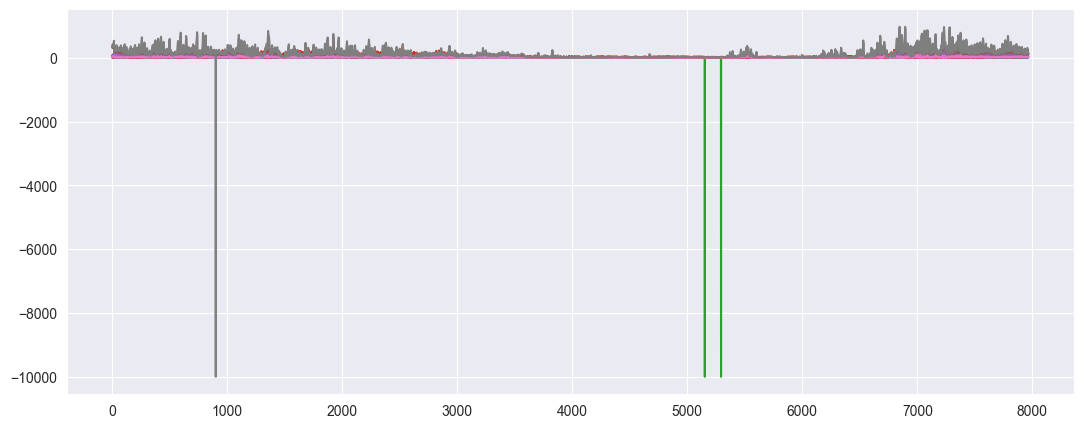

In [79]:
plt.figure(figsize=(13,5))
plt.plot(df.index, df['NO'])
plt.plot(df.index, df['O3'])
plt.plot(df.index, df['NO2'])
plt.plot(df.index, df['O3'])
plt.plot(df.index, df['SO2'])
plt.plot(df.index, df['PM2_5'])
plt.plot(df.index, df['NH3'])
plt.plot(df.index, df['PM10'])
plt.show()

In [80]:
# Define the columns to plot
columns_to_plot = ['PM2_5', 'PM10', 'AQI']

# Check for the existence of the columns in the DataFrame
valid_columns = [col for col in columns_to_plot if col in df.columns]

# Plot only if valid columns exist
if valid_columns:
    plt.figure(figsize=(10, 6))

    for col in valid_columns:
        plt.plot(df['datetime'], df[col], label=f'{col}', marker='o')  # Dynamic label and marker

    # Adding labels, title, and legend
    plt.title('Air Quality Data Over Time')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No valid air quality columns found in the DataFrame.")


KeyError: 'datetime'

<Figure size 1000x600 with 0 Axes>